<a href="https://colab.research.google.com/github/JulieYego/AI-assignment/blob/main/Nairobi_Office_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#y = mx + c
m = 0.6    #initial start value of gradient
c = 0.2    #initial start value of y-intercept
L = 0.0001 #learning rate
epoch = 50 #number of epochs
epoch_error_list = []
epoch_count_list = []

In [3]:
noise = np.random.normal(1,15,100)

In [4]:
#Generate Data
X = np.random.uniform(10,100,100)
y = m * X+c
Y = y+noise
N = float(len(X))

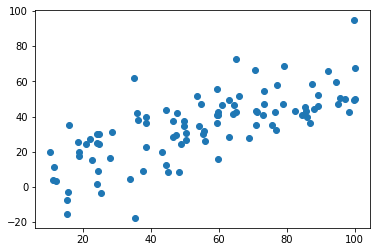

In [17]:
plt.scatter(X,Y)

In [18]:
#mean squared error function for error computation
def mse(N,Y,Y_hat): 
  return (1/N) * sum(Y-Y_hat) ** 2

In [28]:
def gradient_descent_fit(m,c,N,L):
  epoch_error_list = []
  epoch_count_list = []
  for i in range(epoch):
    Y_hat = m * X+c

    #compute error 
    epoch_count_list = epoch_count_list[:]
    epoch_count_list.append(i)

    epoch_error = mse(N,Y,Y_hat)
    epoch_error_list = epoch_error_list[:]
    epoch_error_list.append(epoch_error)

    #Partial derivatives of m and c
    D_m = (-2/N) * sum(X*(Y-Y_hat))
    #Print('D_m ',D_m)
    D_c = (-2/N) * sum(Y-Y_hat)
    #Print('D_c ',D_c)

    #Gradient Descent to update m and c
    m = m - (L * D_m)
    #Print('New m is', m)
    c = c - (L * D_c)
    #Print('New c is', c)

    print("Final m is: ",m," and Final c is: ",c)
    #Return final predicted value of Y-dependent variable
    return Y_hat,epoch_count_list,epoch_error_list

In [21]:
#call gradient descent fit function
returned_params  = gradient_descent_fit(m,c,N,L)
y_predicted      = returned_params[0]
total_epochs     = returned_params[1]
all_epoch_errors = returned_params[2]

Final m is:  0.6073202135235792  and Final c is:  0.20027298604130567


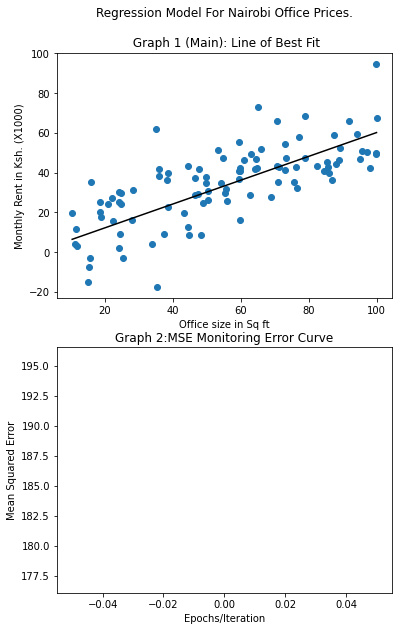

In [29]:
#create plot for both line of best fit and error reduction graphs
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw={'top':2})
ax1.set(xlabel="Office size in Sq ft")
ax1.set(ylabel="Monthly Rent in Ksh. (X1000)")
ax1.set_title("Regression Model For Nairobi Office Prices.\n\n Graph 1 (Main): Line of Best Fit")
ax1.scatter(X,Y)

ax1.plot([min(X),max(X)],[min(y_predicted),max(y_predicted)],color='black')
ax2.set_title("Graph 2:MSE Monitoring Error Curve")
ax2.set(xlabel="Epochs/Iteration")
ax2.set(ylabel="Mean Squared Error")
ax2.plot(total_epochs,all_epoch_errors)

#Destroy the used lists to prevent recarpetting on append
epoch_count_list.clear()
epoch_error_list.clear()